# 선형모델

입력 특성에 대한 선형함수를 만들어 예측을 수행하는 모델

- 회귀 : 선형회귀, 릿지, 랏쏘 등이 있다
- 분류 : 로지스트 회귀, SVM 등등이 있다

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

### 분류

- 로지스트회귀 : 데이터들과 경계선 간의 거리를 최대한 가까이 하려고 노력한다.
- SVM : 데이터들과 경계선 간의 거리를 최대한 멀리 하려고 노력한다.

- c : 이 값이 높으면 정확히 분류하려고 노력함, 이 값이 낮으면 최대한 다수의 데이터에 맞추려고 노력한다.
- 학습한 데이터를 가지고 검증했을 때 정확도가 높게 나오고, 학습하지 않은 데이터를 가지고 검증했을때 정확도가 낮게 나온다면 과적합 현상이 발생한것이다 : c값을 낮춰준다
- 학습한 데이터를 가지고 검증했을 때 정확도가 낮게 나오고, 학습하지 않은 데이터를 가지고 검증했을때도 정확도가 낮게 나온다면 : c값을 높혀준다.

In [2]:
df1 = pd.read_csv('forge.csv')

X = df1.drop(['target'], axis=1)
y = df1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(C=0.01)
model1.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
r1 = model1.score(X_test, y_test)
r1

0.14285714285714285

In [5]:
y_pred = model1.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [6]:
df2 = pd.read_csv('breast_cancer.csv')

map1 = {
    'benign' : 0,
    'malignant' : 1
}
df2['target'] = df2['target'].map(map1)

In [7]:
X = df2.drop(['target'], axis=1)
y = df2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
model2 = LogisticRegression(C=0.01)
model2.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
r2 = model2.score(X_test, y_test)
r2

0.9230769230769231

In [10]:
y_pred = model2.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

### 회귀

In [11]:
df3 = pd.read_csv('wave.csv')

X = df3['data'].values.reshape(-1, 1)
y = df3['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

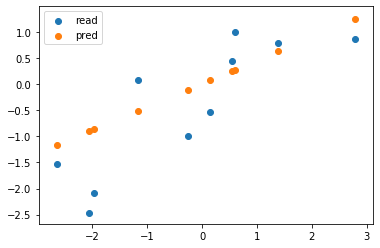

In [13]:
import matplotlib.pyplot as plt
y_pred = model3.predict(X_test)

plt.scatter(X_test, y_test, label='read')
plt.scatter(X_test, y_pred, label='pred')
plt.legend()

In [14]:
df4 = pd.read_csv('boston.csv')

X = df4.drop(['target'], axis=1).values
y = df4['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

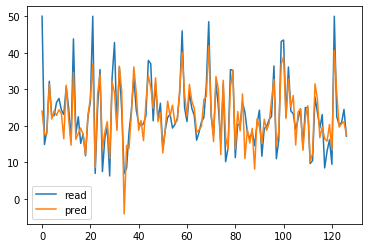

In [16]:
y_pred = model4.predict(X_test)

plt.plot(y_test, label='read')
plt.plot(y_pred, label='pred')
plt.legend()